In [1]:
using DelimitedFiles
using Formatting: printfmt
using Plots
using ScHoLP
using Statistics

# Load true output and estimated output.

In [12]:
dataset_name = "email-Eu"
p = 1.0

true_filename = "../output/mean_$(p)_exact_$dataset_name.txt"
estimated_filename = "../output/mean_$(p)_sampling_$dataset_name.txt"

true_file = open(true_filename, "r")
estimated_file = open(estimated_filename, "r")

true_output = readdlm(true_file)
estimated_output = readdlm(estimated_file)

close(true_file)
close(estimated_file)

l = size(true_output)[1]
true_triangles, true_time = true_output[1:l-2, :], true_output[l-1, :][2]
true_triangles[:, 2] = map(x -> parse(Int64, x[2:length(x)-1]), true_triangles[:, 2])
true_triangles[:, 3] = map(x -> parse(Int64, x[1:length(x)-1]), true_triangles[:, 3])
true_triangles[:, 4] = map(x -> parse(Int64, x[1:length(x)-1]), true_triangles[:, 4])
tmp = []
for i in range(1, stop=l-2)
    w, a, b, c = true_triangles[i, :]
    push!(tmp, (w, (a,b,c)))
end
true_triangles = tmp

l = size(estimated_output)[1]
estimated_triangles, estimated_time = estimated_output[1:l-3, :], estimated_output[l-2, 2]
estimated_triangles[:, 2] = map(x -> parse(Int64, x[2:length(x)-1]), estimated_triangles[:, 2])
estimated_triangles[:, 3] = map(x -> parse(Int64, x[1:length(x)-1]), estimated_triangles[:, 3])
estimated_triangles[:, 4] = map(x -> parse(Int64, x[1:length(x)-1]), estimated_triangles[:, 4])
tmp = []
for i in range(1, stop=l-3)
    w, a, b, c = estimated_triangles[i, :]
    push!(tmp, (w, (a,b,c)))
end
estimated_triangles = tmp
k = estimated_output[l-1, 2]

printfmt("k: {}\n", k)

k: 25


# Time.

In [13]:
printfmt("Time taken by exact algorithm: {}\n", true_time)
printfmt("Time taken by sampling algorithm: {}\n", estimated_time)

Time taken by exact algorithm: 23.437206521
Time taken by sampling algorithm: 1.062785267


# Plot distribution of means in the true and estimated outputs.

There are a total of 395205 triangles in this graph.
μ = 3.709259723406906, σ = 1.341027891469758


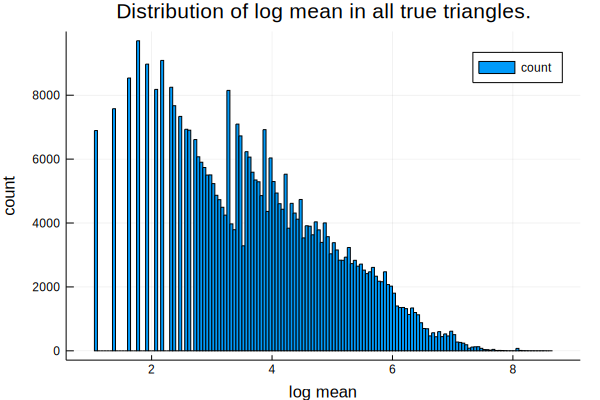

In [14]:
all_true = map(x->log(x[1]), true_triangles[:, 1])
number_triangles = length(all_true)
printfmt("There are a total of {} triangles in this graph.\n", number_triangles)
printfmt("μ = {}, σ = {}\n", mean(all_true), std(all_true))
histogram(all_true, bins=:auto, xlabel="log mean", ylabel="count", label="count",
         title="Distribution of log mean in all true triangles.")

μ = 8.282142629102962, σ = 0.1470225219840817


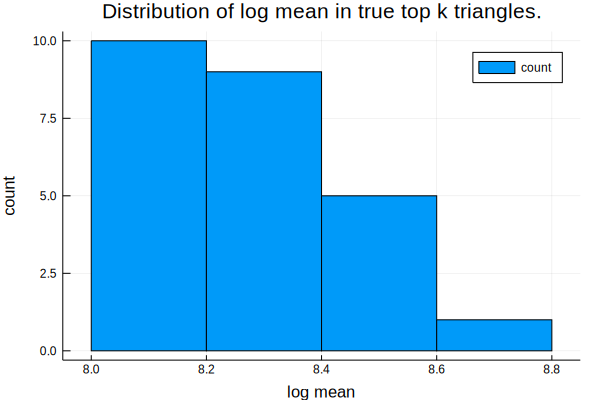

In [15]:
top_k_true = map(x->log(x[1]), true_triangles[1:k, 1])
printfmt("μ = {}, σ = {}\n", mean(top_k_true), std(top_k_true))
histogram(top_k_true, bins=:auto, xlabel="log mean", ylabel="count", label="count",
         title="Distribution of log mean in true top k triangles.")

μ = 8.282142629102962, σ = 0.1470225219840817


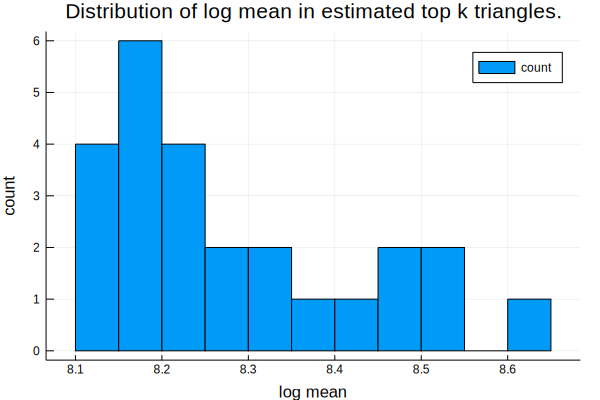

In [16]:
top_k_estimated = map(x->log(x[1]), estimated_triangles[1:k, 1])
printfmt("μ = {}, σ = {}\n", mean(top_k_estimated), std(top_k_estimated))
histogram(top_k_estimated, bins=10, xlabel="log mean", ylabel="count", label="count",
          title="Distribution of log mean in estimated top k triangles.")


# What is the distribution of ranks of estimated triangles?

In [17]:
function find_rank(t)
    return searchsorted(true_triangles, t, by=x->x[1], rev=true)[1]
end

estimated_ranks = [find_rank(t) for t in estimated_triangles]
;

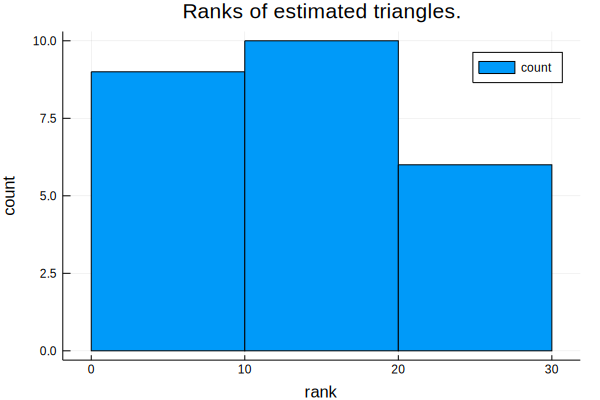

In [18]:
histogram(estimated_ranks, bins=:auto, xlabel="rank", ylabel="count", label="count",
          title="Ranks of estimated triangles.")

# What is the distribution of percentile of the estimated triangles?

In [19]:
estimated_percentiles = [1 - r/number_triangles for r in estimated_ranks]
;

Estimated triangles
Mean percentile: 0.9999671056793309, median percentile: 0.999967105679331


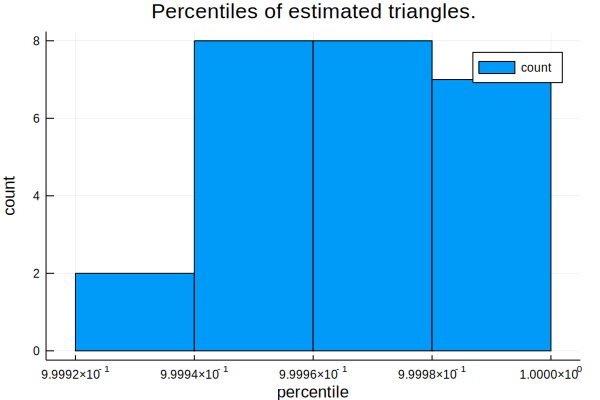

In [20]:
println("Estimated triangles")
printfmt("Mean percentile: {}, median percentile: {}\n",
         mean(estimated_percentiles), median(estimated_percentiles))
histogram(estimated_percentiles, bins=:auto, xlabel="percentile", ylabel="count", label="count",
          title="Percentiles of estimated triangles.")

# How many of the estimated triangles are in the top k?

In [21]:
estimated_accuracy = mean([find_rank(t) <= k for t in estimated_triangles])
printfmt("Estimated accuracy: {}\n", estimated_accuracy)

Estimated accuracy: 1.0
